DBSCAN clustering algorithm
DBSCAN stands for density-based spatial clustering of applications with noise. It's a density-based clustering algorithm, unlike k-means.

This is a good algorithm for finding outliners in a data set. It finds arbitrarily shaped clusters based on the density of data points in different regions. It separates regions by areas of low-density so that it can detect outliers between the high-density clusters.

This algorithm is better than k-means when it comes to working with oddly shaped data.

DBSCAN uses two parameters to determine how clusters are defined: minPts (the minimum number of data points that need to be clustered together for an area to be considered high-density) and eps (the distance used to determine if a data point is in the same area as other data points).

Choosing the right initial parameters is critical for this algorithm to work

In [1]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#Doing Lable Encoder before split the dataset
columns = ['Genre']
encoder=LabelEncoder()
for i in columns:
    dataset[i] = encoder.fit_transform(dataset[i])

In [6]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
X = dataset.iloc[:, 3:5].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
# define the model
dbscan_model = DBSCAN(min_samples=6)

# train the model
dbscan_model.fit(X)

# assign each data point to a cluster
dbscan_result = dbscan_model.fit_predict(X)

# get all of the unique clusters
dbscan_clusters = unique(dbscan_result)


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):


In [11]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

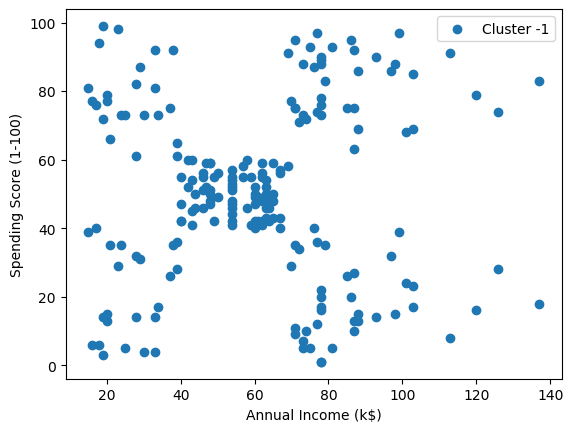

In [12]:
# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    indices = where(dbscan_result == dbscan_clusters)
    # make the plot
    pyplot.scatter(X[indices, 0], X[indices, 1],label=f'Cluster {dbscan_cluster}')
    
# Add labels and legend
pyplot.xlabel('Annual Income (k$)')
pyplot.ylabel('Spending Score (1-100)')
pyplot.legend()
pyplot.show()    


In [13]:
supervised=pd.DataFrame(dataset)

In [14]:
supervised['Cluster_group']=dbscan_result

In [15]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,1,19,15,39,-1
1,2,1,21,15,81,-1
2,3,0,20,16,6,-1
3,4,0,23,16,77,-1
4,5,0,31,17,40,-1
...,...,...,...,...,...,...
195,196,0,35,120,79,-1
196,197,0,45,126,28,-1
197,198,1,32,126,74,-1
198,199,1,32,137,18,-1


C:\Users\jugip\anaconda3\envs\aiml\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


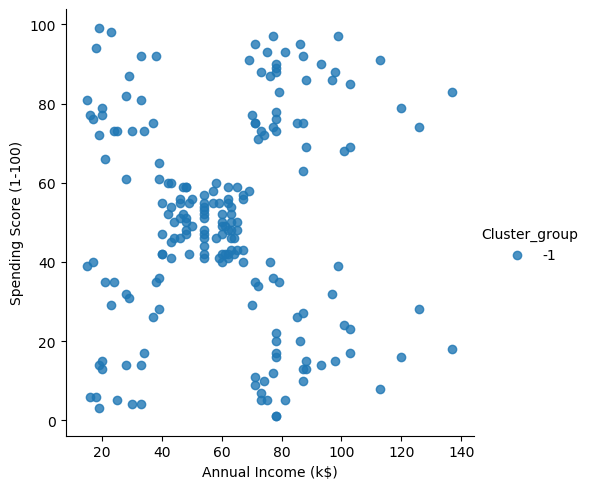

In [16]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)